In [8]:
import os
import ffmpeg
from pydub.utils import mediainfo

def convert_m4a_to_wav_ffmpeg(voice_path, output_path):
    try:
        # FFmpeg ile dönüştürme işlemi
        ffmpeg.input(voice_path).output(output_path).run()
        print(f"✓ Dönüştürme başarılı: {voice_path} -> {output_path}")
        return True
    except ffmpeg.Error as e:
        print(f"✗ Dönüşüm hatası: {e}")
        return False

def is_valid_audio_file(file_path):
    # Dosyanın geçerli bir ses dosyası olup olmadığını kontrol eder
    try:
        info = mediainfo(file_path)
        return 'audio' in info['codec_type']
    except Exception as e:
        print(f"✗ Geçersiz dosya: {file_path}. Hata: {str(e)}")
        return False

def convert_m4a_to_wav(root_path):
    successful_conversions = []
    failed_conversions = []

    # Klasörlerdeki her dosyayı işleyelim
    for person in os.listdir(root_path):
        person_path = os.path.join(root_path, person)

        if os.path.isdir(person_path):  # Sadece kişi klasörleri
            print(f"İşleniyor: {person}")

            for sub_folder in os.listdir(person_path):
                sub_folder_path = os.path.join(person_path, sub_folder)

                if os.path.isdir(sub_folder_path):  # Alt klasörler (örneğin korku)
                    print(f"İşleniyor: {sub_folder} alt klasörü")

                    for voice_file in os.listdir(sub_folder_path):
                        voice_path = os.path.join(sub_folder_path, voice_file)
                        new_voice = os.path.join(sub_folder_path, f"{os.path.splitext(voice_file)[0]}.wav")

                        # Eğer dosya .m4a uzantılı ise
                        if voice_file.endswith(".m4a"):
                            # .wav dosyası zaten varsa, dönüşüm yapılmasın
                            if os.path.exists(new_voice):
                                print(f"✓ {voice_file} zaten dönüştürülmüş. Atlanıyor.")
                                successful_conversions.append(f"{person}/{sub_folder}/{voice_file}")
                            else:
                                print(f"İşleniyor: {voice_file}")
                                # FFmpeg ile dönüştürme
                                if convert_m4a_to_wav_ffmpeg(voice_path, new_voice):
                                    # Dönüşüm sonrası dosyanın geçerliliğini kontrol et
                                    if is_valid_audio_file(new_voice):
                                        successful_conversions.append(f"{person}/{sub_folder}/{voice_file}")
                                    else:
                                        print(f"✗ {new_voice} geçersiz ses dosyası. Siliniyor...")
                                        os.remove(new_voice)
                                        failed_conversions.append(f"{person}/{sub_folder}/{voice_file}")
                                else:
                                    failed_conversions.append(f"{person}/{sub_folder}/{voice_file}")
    
    # Başarı ve hata bilgilerini yazdırma
    print("\nBaşarılı Dönüşümler:")
    for success in successful_conversions:
        print(f"✓ {success}")

    print("\nBaşarısız Dönüşümler:")
    for fail in failed_conversions:
        print(f"✗ {fail}")

# Ses dosyalarının bulunduğu ana dizini belirleyin
root_path = r'Voice'  # Ses dosyalarınızın bulunduğu ana klasörü burada belirtin

print("Dönüşüm Başlıyor...")
convert_m4a_to_wav(root_path)


Dönüşüm Başlıyor...
İşleniyor: elif
İşleniyor: korku alt klasörü
✓ elifkorku1.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifkorku2.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifkorku3.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifkorku4.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifkorku5.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifkorku6.m4a zaten dönüştürülmüş. Atlanıyor.
İşleniyor: mutlu alt klasörü
✓ elifmutlu1.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifmutlu2.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifmutlu3.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifmutlu4.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifmutlu5.m4a zaten dönüştürülmüş. Atlanıyor.
İşleniyor: notr alt klasörü
✓ elifnötr1.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr10.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr2.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr3.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr4.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr5.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr6.m4a zaten dönüştürülmüş. Atlanıyor.
✓ 

In [57]:
import os
import librosa
import numpy as np

# MFCC dosyalarının kaydedileceği dizin
mfcc_save_path = r'C:\SesData_MFCC'

# MFCC parametreleri
n_mfcc = 40  # MFCC özelliği sayısı
frame_length = 25  # Milisaniye cinsinden frame uzunluğu
frame_stride = 10  # Milisaniye cinsinden frame kayması

# MFCC özelliklerini çıkarmak ve kaydetmek için fonksiyon
def extract_mfcc(directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for person in os.listdir(directory):
        person_path = os.path.join(directory, person)
        if os.path.isdir(person_path):  # Kişi klasörlerini kontrol et
            person_mfcc_path = os.path.join(output_directory, person)
            if not os.path.exists(person_mfcc_path):
                os.makedirs(person_mfcc_path)

            print(f"{person} kişisi işleniyor...")
            for file in os.listdir(person_path):
                if file.endswith('.wav'):
                    try:
                        # MFCC dosyasının hedefte olup olmadığını kontrol et
                        mfcc_file_name = os.path.splitext(file)[0] + '.npy'
                        mfcc_file_path = os.path.join(person_mfcc_path, mfcc_file_name)
                        if os.path.exists(mfcc_file_path):
                            print(f"Atlandı (zaten mevcut): {mfcc_file_path}")
                            continue

                        # Ses dosyasını yükleme
                        file_path = os.path.join(person_path, file)
                        y_audio, sr = librosa.load(file_path, sr=None)

                        # MFCC çıkarma
                        hop_length = int(frame_stride * sr / 1000)
                        n_fft = int(frame_length * sr / 1000)
                        mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)

                        # MFCC'yi kaydetme
                        np.save(mfcc_file_path, mfcc)
                        print(f"✓ {file} için MFCC başarıyla kaydedildi: {mfcc_file_path}")
                    except Exception as e:
                        print(f"✗ {file} için işlem başarısız: {e}")

# MFCC çıkarım sürecini başlat
extract_mfcc(root_path, mfcc_save_path)


aliberk kişisi işleniyor...
Atlandı (zaten mevcut): C:\SesData_MFCC\aliberk\aliberk1.npy
Atlandı (zaten mevcut): C:\SesData_MFCC\aliberk\aliberk2.npy
Atlandı (zaten mevcut): C:\SesData_MFCC\aliberk\aliberk3.npy
Atlandı (zaten mevcut): C:\SesData_MFCC\aliberk\denoised_aliberk3.npy
irem kişisi işleniyor...
Atlandı (zaten mevcut): C:\SesData_MFCC\irem\irem1.npy
Atlandı (zaten mevcut): C:\SesData_MFCC\irem\irem2.npy
Atlandı (zaten mevcut): C:\SesData_MFCC\irem\irem3.npy


In [17]:
import os
import librosa
import numpy as np
import csv

# MFCC parametreleri
n_mfcc = 40  # MFCC özelliği sayısı
frame_length = 25  # Milisaniye cinsinden frame uzunluğu
frame_stride = 10  # Milisaniye cinsinden frame kayması

# MFCC özelliklerini çıkarmak için fonksiyon
def extract_audio_features(file_path):
    try:
        # Ses dosyasını yükle
        y, sr = librosa.load(file_path, sr=None)
        # MFCC özelliklerini çıkar
        hop_length = int(frame_stride * sr / 1000)
        n_fft = int(frame_length * sr / 1000)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
        mfcc_mean = np.mean(mfcc, axis=1)  # MFCC'nin ortalama değerlerini al
        return mfcc_mean
    except Exception as e:
        print(f"Dosya yükleme hatası: {file_path}, Hata: {e}")
        return None

def extract_features_and_save_to_csv(directory, output_csv_file):
    features = []  # MFCC özelliklerini depolamak için liste
    labels = []  # Etiketleri depolamak için liste

    # Dosyaya yazmak için csv writer
    with open(output_csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Başlık satırını yazalım (MFCC'ler + Etiketler)
        header = [f"MFCC_{i+1}" for i in range(n_mfcc)] + ["Kişi", "Ses Türü"]
        writer.writerow(header)

        # Klasördeki her kişiyi (üst klasör) işleyelim
        for person in os.listdir(directory):
            person_path = os.path.join(directory, person)
            if os.path.isdir(person_path):  # Kişi klasörlerini kontrol et
                # Alt klasörleri (örneğin korku, mutlu) işleyelim
                for sub_folder in os.listdir(person_path):
                    sub_folder_path = os.path.join(person_path, sub_folder)
                    if os.path.isdir(sub_folder_path):  # Alt klasörleri kontrol et
                        for file in os.listdir(sub_folder_path):
                            if file.endswith('.wav'):
                                file_path = os.path.join(sub_folder_path, file)

                                # MFCC özelliğini çıkar
                                mfcc_features = extract_audio_features(file_path)
                                if mfcc_features is not None:
                                    # Etiketler: Kişi adı ve ses türü
                                    labels.append([person, sub_folder])
                                    # MFCC'yi dosyaya yaz
                                    writer.writerow(list(mfcc_features) + [person, sub_folder])
                                    # Özellikleri listeye ekle
                                    features.append(mfcc_features)

    # Özelliklerin boyutunu yazdırma
    features = np.array(features)  # Özellikleri numpy dizisine dönüştür
    print(f"Özellikler boyutu: {features.shape}")
    print(f"Etiketler: {labels[:5]}")  # İlk 5 etiketi yazdır

# Klasör yolunu ve üst klasör yapısını belirtin
root_path = 'Voice'  # Ses dosyalarınızın bulunduğu ana klasör burada belirtiliyor
output_csv_file = 'mfcc_features_labels.csv'  # Özelliklerin ve etiketlerin kaydedileceği dosya

# Özellikleri çıkar ve CSV dosyasına kaydet
extract_features_and_save_to_csv(root_path, output_csv_file)

print(f"MFCC özellikleri ve etiketler '{output_csv_file}' dosyasına başarıyla kaydedildi.")


Özellikler boyutu: (97, 40)
Etiketler: [['elif', 'korku'], ['elif', 'korku'], ['elif', 'korku'], ['elif', 'korku'], ['elif', 'korku']]
MFCC özellikleri ve etiketler 'mfcc_features_labels.csv' dosyasına başarıyla kaydedildi.


Ses Dosyaları İçin WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...
İşleniyor: aliberk


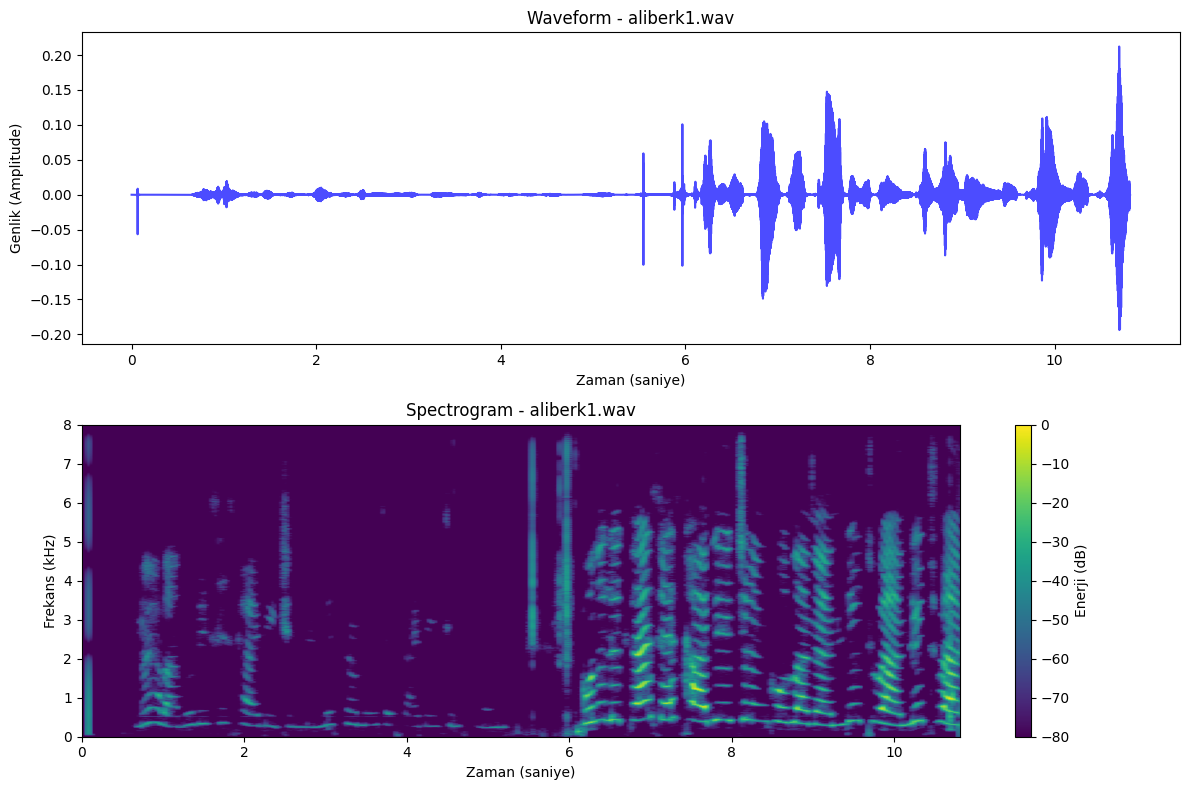

İşleniyor: irem


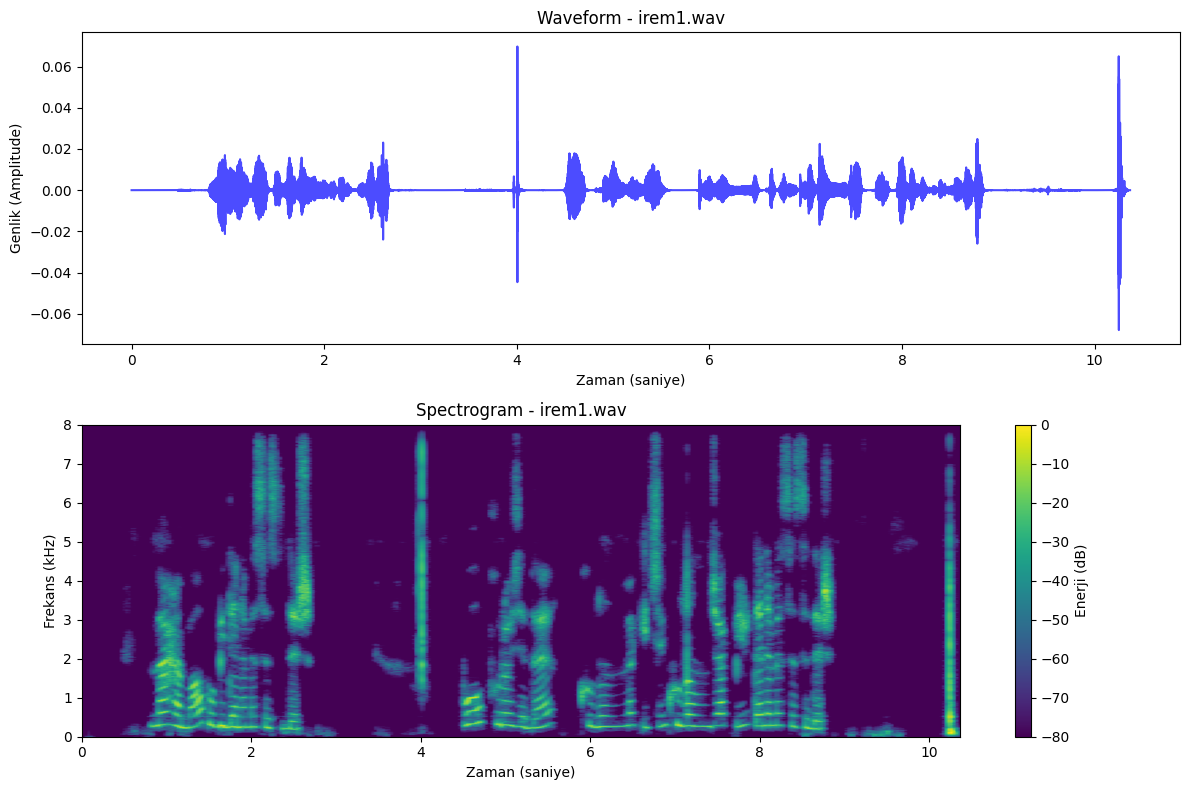

In [59]:
import librosa
import matplotlib.pyplot as plt
import os
import noisereduce as nr
import numpy as np

def plot_waveform_and_spectrogram_histogram(file_path):
    # Ses dosyasını yükle
    y, sr = librosa.load(file_path, sr=16000)
    
    # Gürültü azaltma (isteğe bağlı)
    y = nr.reduce_noise(y=y, sr=sr)
    
    # Waveform (dalga formu) histogramı
    plt.figure(figsize=(12, 8))

    # Waveform Histogramı: Amplitude ve Zaman
    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0, len(y) / sr, num=len(y)), y, color='blue', alpha=0.7)
    plt.title(f'Waveform - {os.path.basename(file_path)}')
    plt.xlabel('Zaman (saniye)')
    plt.ylabel('Genlik (Amplitude)')

    # Spectrogram (frekans spektrumu) histogramı
    D = librosa.stft(y)  # Short-Time Fourier Transform
    S_db, phase = librosa.magphase(D)  # Sadece genlik
    S_db = librosa.amplitude_to_db(S_db, ref=np.max)  # Logaritmik dönüşüm (dB)

    # Spectrogram Enerji Histogramı: kHz ve Zaman
    plt.subplot(2, 1, 2)
    plt.imshow(S_db, aspect='auto', cmap='viridis', origin='lower', 
               extent=[0, len(y) / sr, 0, sr / 2000])  # X: Zaman, Y: Frekans (kHz)
    plt.title(f'Spectrogram - {os.path.basename(file_path)}')
    plt.xlabel('Zaman (saniye)')
    plt.ylabel('Frekans (kHz)')
    plt.colorbar(label='Enerji (dB)')

    plt.tight_layout()
    plt.show()

def process_and_plot_waveform_spectrogram_histograms(root_path):
    for person in os.listdir(root_path):
        person_path = os.path.join(root_path, person)
        print(f"İşleniyor: {person}")
        
        # Kişinin klasöründeki ilk .wav dosyasını bul
        voice_files = [f for f in os.listdir(person_path) if f.endswith(".wav")]
        if voice_files:
            first_voice_file = voice_files[0]  # İlk dosya
            voice_path = os.path.join(person_path, first_voice_file)
            plot_waveform_and_spectrogram_histogram(voice_path)

# Verilerin bulunduğu klasör yolu
root_path = r"C:/SesData"  # Ses dosyalarının bulunduğu ana klasör yolu

# Klasördeki her kişinin ilk ses dosyasını işleyip histogramları çiz
print("Ses Dosyaları İçin WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...")
process_and_plot_waveform_spectrogram_histograms(root_path)


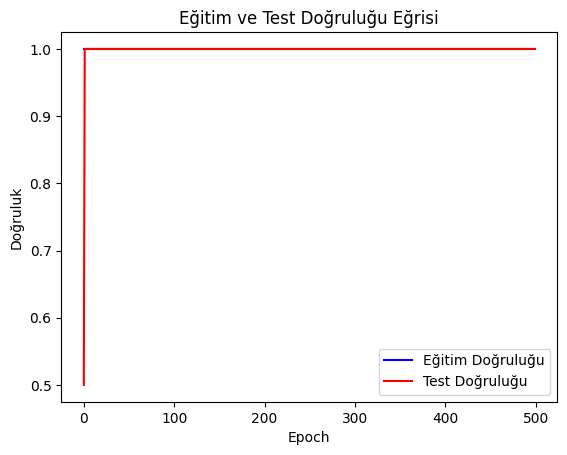

In [8]:
import os
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt

# MFCC'lerin bulunduğu dizin
mfcc_save_path = r'C:\SesData_MFCC'

# Özellikler ve etiketler için liste oluşturma
X = []
y = []

# MFCC dosyalarını yükleme
for person in os.listdir(mfcc_save_path):
    person_path = os.path.join(mfcc_save_path, person)
    if os.path.isdir(person_path):  # Kişi klasörleri
        for file in os.listdir(person_path):
            if file.endswith('.npy'):
                file_path = os.path.join(person_path, file)
                mfcc = np.load(file_path)
                X.append(np.mean(mfcc, axis=1))  # MFCC'yi ortalama alarak vektörleştir
                y.append(person)  # Etiket, kişilerin klasör adıyla eşleşiyor

X = np.array(X)
y = np.array(y)

# Etiketleri sayısal değerlere dönüştürme
le = LabelEncoder()
y = le.fit_transform(y)

# Veri kümesini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP modeli oluşturma
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, warm_start=True)

# Eğitim sırasında doğrulukları kaydetme
train_accuracies = []
test_accuracies = []

# Eğitim işlemi ve doğrulukların kaydedilmesi
for i in range(1, model.max_iter + 1):
    model.fit(X_train, y_train)
    
    # Eğitim doğruluğu
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Test doğruluğu
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Eğitim ve Test doğruluğu görselleştirme
plt.plot(train_accuracies, label='Eğitim Doğruluğu', color='b')
plt.plot(test_accuracies, label='Test Doğruluğu', color='r')
plt.title('Eğitim ve Test Doğruluğu Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()
